# Cutting Rod

## Descripción del problema

![1.png](1.png)

El problema cutting rod consiste en encontrar la cantidad óptima de cortes de
forma que la ganancia generada por la venta de la varilla (o fracciones) de
esta sea máxima.

**Entrada:**

largo de una varilla $n$, cuya ganancia queremos maximizar.

arreglo de precios $p$: Con los precios de una varilla en el intervalo $(0..n)$.

**Salida:**

$m$: Ganancia máxima.

$c$: Arreglo de cortes óptimos.


## Descripción del algoritmo recursivo

El algoritmo recursivo primero que nada define un caso base. Este corresponde a
la  solución de un subproblema de tamaño $0$. Cuyo retorno corresponde a una
ganancia máxima $0$. Para resolver el problema se define una variable $q$ y se
le asigna un valor mínimo. (`-math.inf` en python). En esta se almacenará la
ganancia máxima posible para el corte en $i$.


Posteriormente se itera por todos los subproblemas posibles. Iniciando con un
contador $i$ en el rango $(0,n)$. Se procede a revisar el corte en cada posición
$i$.

Este corte da origen a dos barras, una de largo $n-i$ y otra de largo $i$.
Resolvemos el subproblema de tamaño $n-i$ de manera recursiva. El costo de la
barra de largo $i$ es obtenido del arreglo de precios $p$ puesto que esta no
será fraccionada.

Se suman las ganancias de ambas barras, en el caso de ser mayor que la ganancia máxima para el corte en $i$. Se actualiza la variable $q$.

Una vez finalizado el algoritmo, se retorna la variable $q$, la cual posee la ganancia máxima.

### Guardado de cortes

Los cortes son obtenidos recursivamente en cada iteración. Posteriormente se añade el corte actual (en la posición $i$) al arreglo de cortes obtenido. Por conveniencia y facilidad de comprensión de la salida del algoritmo aumentamos en uno este valor para que la indexación inicie en el valor 1 y no en 0.

Una vez finalizada la ejecución del algoritmo los cortes son recuperados. Esto es necesario debido a que los cortes almacenados son los de los subproblemas y no los del problema original. Para esto se acumulan los valores, sumando el elemento actual al siguiente.

## Descripción del algoritmo DP

El problema del corte de varillas tiene una subestructura óptima, lo que permite
la utilización de la programación dinámica.

Se dice que un problema tiene una subestructura óptima si la solución puede ser
obtenida por medio de una combinación de soluciones de subproblemas.
Generalmente las estructuras de estos problemas son descritos por medio de la
recursión (como se observa en la implementación anterior). Con la particularidad
de que los subproblemas se solapan, es decir, se van repitiendo. Esto implica
que el espacio, o la dificultad de los irá disminuyendo. El algoritmo recursivo
que resolverá el problema deberá generar recursivamente los mismos problemas, en
vez de generar nuevos.

Para la implementación dinámica, se define un arreglo $r$. Este será utilizado
para mapear cada subproblema a su corte máximo. Posteriormente se resolverá la
totalidad de subproblemas, partiendo por el más pequeño y finalizando con el
problema original.

Para cada iteración se presenta un subproblema de tamaño $i$. Este es resuelto revisando todos los posibles casos de dicho subproblema, esto es logrado utilizando un contador $j$ que iterará en el rango $(0, i)$.

Para cada corte $i-j$ se calcula dinámicamente el máximo actual, ubicandolo en el mapa/arreglo $r$. Además, obtenemos la ganancia del resto de la barra $j$. La suma de ambos valores representa la ganancia del corte, en el caso de ser máxima, esta es almacenada en el arreglo $r$ para el subproblema $i$.

Una vez todos los subproblemas son resueltos correctamente es posible resolver (de la misma manera) el problema original.

### Guardado de cortes

Para guardar los cortes. Se define un arreglo `cortes` de largo $n$.

En el caso de que el corte en $i-j$ genere una ganancia máxima, se almacena la posición de este corte para el subproblema $i$. Cuyo valor corresponderá a $i-j(-1)$ (El -1 no es incluido para que la indexación del arreglo de salida inicie en 1 y no en 0).

Una vez resuelto el problema, es decir, al finalizar ambos ciclos, se recorre el arreglo de cortes (aunque no linealmente). Se posiciona un cortador $d$ en el corte del problema original `cortes[d-1]` Cada corte $d$ es guardado en el arreglo de salida. de atrás para adelante, esto es logrado insertando en el arreglo de salida un corte en $n-d$.

Posteriormente se actualiza el iterador $d$ con el corte del subproblema del subproblema anterior (inicialmente el problema original). `d = cortes[d-1]`. Se repite este proceso hasta llegar al caso base $d=0$.

## Ejemplo

Dado un arreglo de precios $p = [1,2,2]$ y una barra de largo $n$. Se contemplan todos los casos posibles.

El primer caso que uno podría considerar es la barra sin cortes. Esto es equivalente a un corte en el índice $0$. El cual produce, en este caso una ganancia $2$.

El segundo caso es Considerando un corte en la primera posición. Esto da origen a dos barras, una de largo 1 y otra de largo 2. La ganancia de la barra de largo 1 es fácilmente obtenible del arreglo de precios, sin embargo la de largo dos tiene que ser calculada, pues puede que su máximo posea cortes en la barra.

Una barra de tamaño dos tiene la opción de estar cortada o entera, las ganancias de estas dos opciones son 2 y 2 respectivamente. Por lo que en este caso da igual.

Por lo que la ganancia generada por una barra de largo 1 y otra de largo 2 es de 3. Ganancia hasta ahora, máxima.

Es fácil notar que para esta barra el mayor precio obtenible es tres. Por lo que si repetimos el proceso y actualizamos la ganancia máxima, en el caso de serlo. Obtendremos como resultado la ganancia del corte máximo.


## Implementación recursiva

In [ ]:
import math
import numpy as np
"""
Cutting rod recursivo

Parametros:
---
p: arreglo de precios
n: tamaño de la barra
l: Nivel de identación de los prints
r: Nivel de recursión
v: Verbose? si/no 
! TODO : El algoritmo debe retornar los cortes 
"""
def r_cutting_rod(p, n = -1, l = 0, v = False, counting = False):

    # Proteger de entradas inválidas
    if n > len(p): raise Exception("Error: La barra ingresada es de tamaño" + 
     "mayor al arreglo de precios.")

     
    if n == -1: n = len(p) # Obtener n (no n-1 :v)

    if v: print(" " * (l*4) + "Se obtiene una barra de largo", n, "{")

    # Caso base
    if n <= 0: 
        if v: print(" " * (l*4 + 4) + "Caso base \n" + " " * (l*4) + "}")
        return 0, [] # no hay cortes

    cortes = np.zeros(n+1, int)
    # print ("    " * l + "barra [", "0 "*n + "] ,ganancia = ", p[n-1])
    q = -math.inf # Almacena la ganancia mayor
    for i in range(n):

        if v: print (" " * 4*(l+1) + f"Se revisa el {i+1} corte, formando una" +
            f"barra de largo {n - i-1} y una de largo {i+1}")

        # Obtener costo del corte de manera recursiva

        if counting: 
            global count; count+=1
        c, rcortes = r_cutting_rod(p, n-i-1, l = l + 2, counting = True) 

        c += p[i]

        if v: print(" "*4*(l+1)+ f"El corte en {i+1} genera una ganancia {c}")
        if v: print(" "*4*(l+1)+ f"El mayor entre {q} y {c} es {max(q,c)}");

        if n-i-1 != 0: 
            rcortes.append(i+1)
            prev = i+1

        if c > q: # si el corte actual es máximo:
            q = c
            cortes = rcortes
        if v: print(" " * 4 *l + 4*" " + f"n = {n}, i = {i}, q = {q}, c = {c}")
    if v: print (" " * l * 4 + f"}} Máximo = {q}")


    return q, cortes # Devolver valor máximo de ganancia
# r, c = r_cutting_rod([3,5,8,9,10,17,17,20]) # se corta en cada posicion
# print(r, c[1:])
# r, c = r_cutting_rod([3,2]) # se corta en 0 y en 1
# print(r, c[1:])

# r, c = r_cutting_rod([3]) # no se corta
# print(r, c[1:])

# r, c = r_cutting_rod([1, 5, 8, 9, 10, 17, 17, 20])
# print(r,c)

# print(r_cutting_rod([1,5,8,9,10,17,17,20,24,25]))

count = 0
# m,c = (r_cutting_rod([3,5,8,9,10,17,17,20],v = True, counting = True))
m,c = (r_cutting_rod([1,1.5,2],v = True, counting = True))

for i in range(1,len(c)):
    c[i] += c[i-1]
print("max:",m,"cortes:",c, "cuenta:", count)

Se obtiene una barra de largo 8 {
    Se revisa el 1 corte, formando unabarra de largo 7 y una de largo 1
    El corte en 1 genera una ganancia 24
    El mayor entre -inf y 24 es 24
    n = 8, i = 0, q = 24, c = 24
    Se revisa el 2 corte, formando unabarra de largo 6 y una de largo 2
    El corte en 2 genera una ganancia 23
    El mayor entre 24 y 23 es 24
    n = 8, i = 1, q = 24, c = 23
    Se revisa el 3 corte, formando unabarra de largo 5 y una de largo 3
    El corte en 3 genera una ganancia 23
    El mayor entre 24 y 23 es 24
    n = 8, i = 2, q = 24, c = 23
    Se revisa el 4 corte, formando unabarra de largo 4 y una de largo 4
    El corte en 4 genera una ganancia 21
    El mayor entre 24 y 21 es 24
    n = 8, i = 3, q = 24, c = 21
    Se revisa el 5 corte, formando unabarra de largo 3 y una de largo 5
    El corte en 5 genera una ganancia 19
    El mayor entre 24 y 19 es 24
    n = 8, i = 4, q = 24, c = 19
    Se revisa el 6 corte, formando unabarra de largo 2 y una de largo

## Implementación DP (Dynamic Programming)

In [28]:
import math
import numpy as np
from termcolor import cprint
"""
Cutting rod dinámico

Parametros:
---
p: arreglo de precios
n: tamaño de la barra
v: Verbose? si/no 
El algoritmo retorna las posiciones del corte
! TODO : verbose.
"""
def dp_cutting_rod(p, n = -1, v = False, counting = False):
    if counting: global count;
    if n == -1: n = len(p) # Obtener n automáticamente
    if v: print("Se obtiene una barra \t [ " + f"{n} "*n + ']')
    r = np.zeros(n+1, int);
    cortes = np.zeros(n, int);
    for i in range(n): # Recorre los elementos
        q = -math.inf # Guarda la ganancia máxima
        if v: print(" " *1*4 + "Se revisa el corte \t ", end = "") #11
        if v: cprint(("[ " + f"{i+1} "*(i+1) + "] "), color = "red", end = "")  #1
        if v: print()
        for j in range(i+1):

            c = p[j] + r[i-j-1] # Se obtiene dinámicamente el subproblema

            if counting: count += 1

            if v: print(" "*2*4 +"[ " + f"{j+1} "*(j+1) + "] ", end = "")
            if v: cc = "red" if r[i-j] == 0 else "green"
            if v: cprint((("[ " + f"{i-j} "*(i-j-1) + "] ")if i-j-1 != 0 else ""), color = cc, end = "")
            if v: print(f"ganancia: {c}", end = "")
            if v: print()
            if c > q:
                q = c  # Se revisa si conviene el corte print (" (maxima)" if q == c else "") r[i] = (q) # Se guarda el subproblema $i$
                cortes[i] = i-j
        r[i] = q
        if v: cprint(("[ " + f"{i} "*i + "]" if i != 0 else ""), color = "yellow", end = "")  #1
        if v: print (f": max = {q}")
        # print(q)
    d = cortes[n-1]; dd = []
    while d != 0:
        dd.append(n-d)
        d = cortes[d-1];
    return r[n-1], dd # Se retorna la máxima ganancia
# r, c =dp_cutting_rod([3,5,8,9,10,17,17,20]) # Se corta en trozos de 1u
# print(r,c)
# r, c = dp_cutting_rod([3,2]) # Se corta en trozos de 1u
# print(r,c)
r, c = dp_cutting_rod([3]) 
print(r,c) # No se corta, corte en a[0] = a

r, c = dp_cutting_rod([1,5,8,9,10,17,17,20]) # Se corta en 2 y 6
print(r,c) # No se corta, corte en a[0] = a

r, c =dp_cutting_rod([3,5,8,9,10,17,17,20]) # Se corta en trozos de 1u
print(r,c)

3 []
22 [2]
24 [1, 2, 3, 4, 5, 6, 7]


## Prueba de correctitud del algoritmo dinámico

Lema: El arreglo auxiliar posee las soluciones de todos los subproblemas 
anteriores

**Inicialización:** No existen subproblemas anteriores. ($i=0$).

**Mantención**: Se calcula el subproblema del corte en la posición actual ($i$).

**Finalización**: Todos los subproblemas han sido calculados
 correctamente.

El arreglo auxiliar que guarda los resultados contiene las solución de todos
los subproblemas, junto con la solución del problema inicial.

## Prueba del tiempo de ejecución del algoritmo recursivo

Es posible definir la función de recursión $T(n)$ en términos de todos los
sub-problemas posibles (todos los cortes posibles). Esto es lograble iterando
$i$ de $0$ hasta $n-1$. Pasando efectivamente por todos los subproblemas.
La función de recurrencia $T(n)$ es la siguiente.

$$
T(n) = \sum_{i=0}^{n-1} {T(i)}
$$

Para probar el tiempo de ejecución se dice que $T(n) = 2^n$ es correcto para
un valor de $n$ arbitrario. Luego:

$$
T(n+1) = T(n) + \sum_{i=0}^{n-1} {T(i)}
$$

Reemplazando, obtenemos:

$$
T(n+1) = T(n) + T(n) 
$$

$$
2 \cdot 2^n = 2^{n+1}
$$


## Prueba del tiempo de ejecución del algoritmo DP

El tiempo de ejecución de esta rutina es $O(n^2)$ ya que cada subproblema
es resuelto exactamente una vez. Para resolver el subproblema en la posición
$i$, realizamos $i$ iteraciones del ciclo. 

Para calcular esto se define el tiempo de ejecución $T(n)$:

$$
\begin {aligned}
T(n) &= c \sum_{i = 0} ^ {n-1} \sum _ {j = 1}  ^ {i} j \\
&=  c \sum_{i = 0} ^ {n-1} j \\
&=  c \cdot \cfrac {n (n+1)} {2} \\
&=  O(n^2)


\end {aligned}
$$


## Complejidad espacial del algoritmo DP

Teorema: la implementación dinámica tiene una complejidad espacial $O(n)$.

Para la solución del problema es necesario almacenar un valor por cada posible corte / subproblema, este valor es almacenado en el arreglo $r$ Cuyo tamaño depende linealmente del tamaño del arreglo. Por lo que la complejidad es $O(n)$.

## Experimentos

### Comparación DP / recursivo

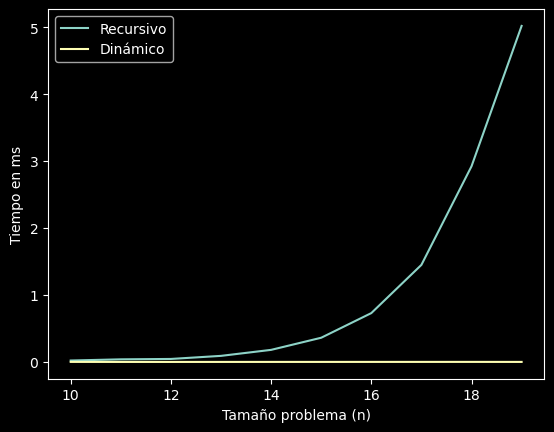

In [29]:
# Setup

from timeit import repeat as r
from random import randint
from matplotlib import pyplot as plt

fmi = "from __main__ import "
acr = "as cr"
import_recursive = fmi + "r_cutting_rod " + acr
import_dp = fmi + "dp_cutting_rod " + acr
n = 10
rpt = 1

def rand_arr(n):
    a = []; p = 0;
    for i in range(n):
        r = randint(1, 10);
        a.append(p+r)
        p += r
    return a


# Arrs
x = [];
y1 = [];
y2 = [];

# Do
for i in range(10, 20):
    a = rand_arr(i);
    t1 = r(
        setup = import_recursive,
        stmt = f"cr({a})",
        number = n,
        repeat = rpt
        )
    t2 = r(
        setup = import_dp,
        stmt = f"cr({a})",
        number = n,
        repeat = rpt
    )
    x.append(i)
    y1.append(t1)
    y2.append(t2)
# Graph
plt.clf() # clear
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Recursivo", "Dinámico"])
plt.xlabel("Tamaño problema (n)")
plt.ylabel("Tiempo en ms")
plt.show()

Es posible observar una abismal diferencia entre los tiempos de ejecución de
las dos implementaciones. A pesar de que el algoritmo dinámico tiene una cota
que uno podría considerar "elevada" al ser $O(n^2)$ este presenta un mejor
comportamiento contra la aún más elevada cota asintótica de la solución
 recursiva.

La solución recursiva deberá revisar cada posible combinación. Al ser su
complejidad $O(2^n)$. Cada iteración doblará el tiempo de ejecución de la
iteración anterior.

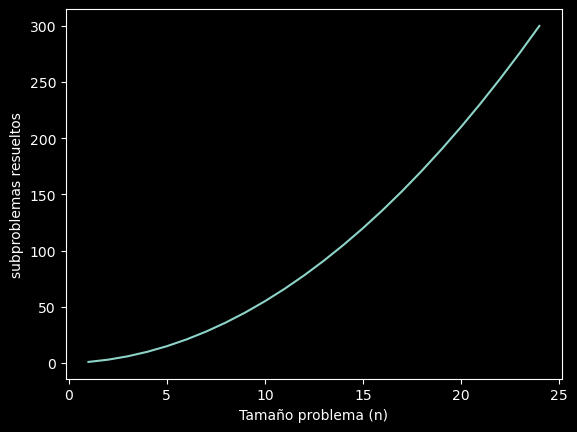

In [32]:

# Setup

from timeit import repeat as r
from random import randint
from matplotlib import pyplot as plt

fmi = "from __main__ import "
acr = "as cr"
import_recursive = fmi + "r_cutting_rod " + acr
import_dp = fmi + "dp_cutting_rod " + acr
n = 10
rpt = 1

def rand_arr(n):
    a = []; p = 0;
    for i in range(n):
        r = randint(1, 10);
        a.append(p+r)
        p += r
    return a


# Arrs
x = [];
y1 = [];

# Do
for i in range(1, 25):
    a = rand_arr(i);
    count = 0;
    dp_cutting_rod(a, counting = True);
    x.append(i)
    y1.append(count)
# Graph
plt.clf() # clear
plt.plot(x,y1)
plt.xlabel("Tamaño problema (n)")
plt.ylabel("subproblemas resueltos")
plt.show()